# <center> Scatter Plot </center>
---

## Importing the data

In [1]:
import data
import pandas as pd
import matplotlib.pyplot as plt

rawData = data.Data()

## Find rows by ID

In [2]:
datesList = rawData.getAllModified()
datesList.loc[datesList.id=='arxivorg:CBBFE8A2']

,id,modified
0,arxivorg:CBBFE8A2,2021-01-12T00:00:00Z


In [3]:
singleDate = datesList.loc[datesList.id=='arxivorg:CBBFE8A2'].get('modified').iloc[0]
singleDate

'2021-01-12T00:00:00Z'

## Scatter Plot Method

In [4]:
def makeScatterPlotByTag(tag):
    datesList = rawData.getAllModified()
    tagsList = rawData.getAllTags()

    result = tagsList.loc[tagsList.tags==tag]

    dates = []
    for id in result.id:
        date = datesList.loc[datesList.id==id].get('modified').iloc[0]
        dates.append(date)

    dates = [pd.to_datetime(d) for d in dates]
    return plt.scatter(dates, result.id, s =10, c = 'red')

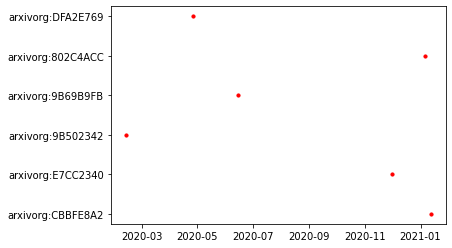

In [5]:
result = makeScatterPlotByTag('wang')
result

AttributeError: 'PathCollection' object has no attribute 'set_xlabel'

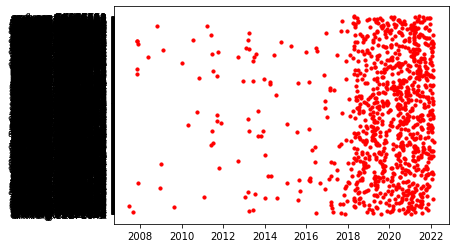

In [6]:
rawData.makeScatterPlotByTag('artificial intelligence')